In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
np.set_printoptions(precision = 15) 
img = plt.imread('imagen_muestra.png')
img
img.shape
img[:,:,0].shape

img = img[:,:,0]

Text(0.5, 1.0, 'Imagen en escala de grises')

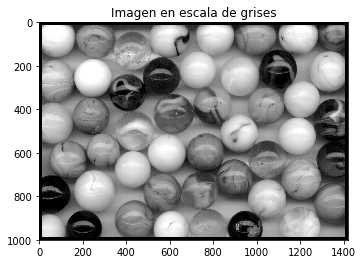

In [5]:
imgplot = plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')

(1001, 1001)
(1001,)
(1001, 1419)


Text(0.5, 1.0, 'Imagen utilizando SVD')

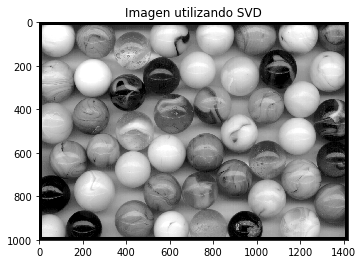

In [6]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)
print(U.shape)
print(S.shape)
print(V_T.shape)
img_svd = (U*S)@V_T
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')

Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

Text(0.5, 1.0, 'SVD truncada a 1')

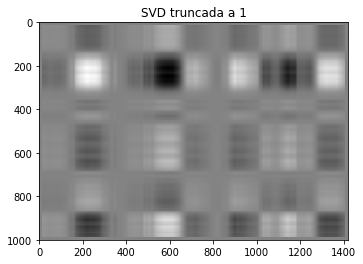

In [7]:
img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')

Text(0.5, 1.0, 'SVD truncada a 2')

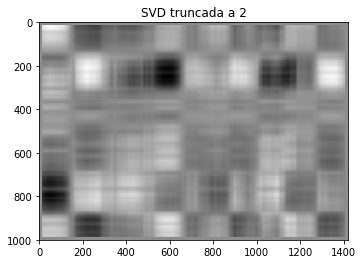

In [8]:
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')

## Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares
## Ejercicio: resolver este caso

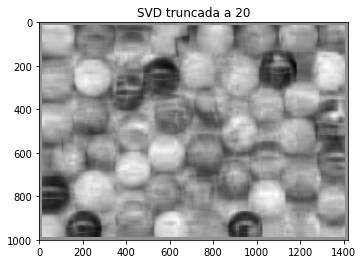

In [18]:
#quedó una función recursiva bastante fregona
def reconstruir_imagen_con_n_vec_sing(n, i=1, img=0):
    if i == n:
        return img
    else:
        return img + reconstruir_imagen_con_n_vec_sing(n, i+1,np.outer((U[:,i]*S[i]),V_T[i,:]))
    
#TODO: imorimir los 5 casos, no sólo 20.
mi_imagen = reconstruir_imagen_con_n_vec_sing(20)    
plt.imshow(mi_imagen, cmap='gray')
plt.title('SVD truncada a ' + str(20))
plt.show()